In [6]:
import numpy as np

# Constants
EMITTED_FREQUENCY = 80000  # Frequency emitted by the bat in Hz (typical for some CF bats)
SPEED_OF_SOUND = 343  # Speed of sound in m/s at 20°C in air

def calculate_doppler_shift(emitted_frequency, relative_speed):
    """
    Calculate the Doppler-shifted frequency based on the relative speed of the target.
    Assuming the bat and target are moving directly towards or away from each other.
    """
    return emitted_frequency * (SPEED_OF_SOUND + relative_speed) / SPEED_OF_SOUND

def simulate_auditory_activity(relative_speed):
    """
    Simulate auditory activity in bats by calculating the Doppler-shifted frequency
    and determining how it might be processed.
    """
    # Calculate the Doppler-shifted frequency
    detected_frequency = calculate_doppler_shift(EMITTED_FREQUENCY, relative_speed)
    
    # Simulate processing - this could be expanded to include more complex neural processing
    # For this example, we'll simply compare the detected frequency to the emitted frequency
    frequency_difference = detected_frequency - EMITTED_FREQUENCY
    
    # Simulate a basic response - could be extended to represent neural firing rates, etc.
    if frequency_difference > 0:
        print(f"Target approaching. Detected frequency: {detected_frequency} Hz")
    elif frequency_difference < 0:
        print(f"Target receding. Detected frequency: {detected_frequency} Hz")
    else:
        print("No movement detected.")

# Example simulation of auditory activity for a target moving towards the bat at 5 m/s
simulate_auditory_activity(5)


Target approaching. Detected frequency: 81166.1807580175 Hz


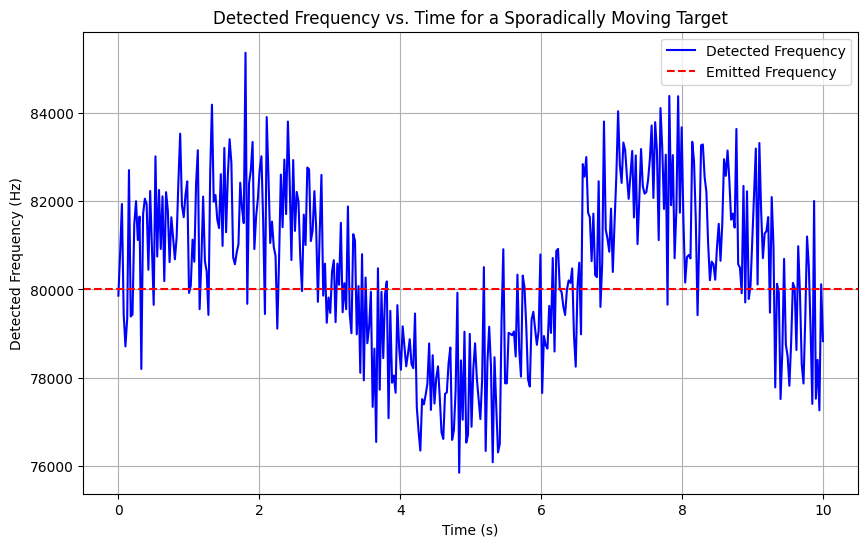

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
EMITTED_FREQUENCY = 80000  # Frequency emitted by the bat in Hz

def calculate_doppler_shift(emitted_frequency, relative_speed, speed_of_sound=343):
    """
    Calculate the Doppler-shifted frequency based on the relative speed of the target.
    Doppler Shift: Lower frequencies in echo stream compared when compared to emitted pulse stream indicate
    target moving away (slower relative velocity) and vice versa.
    """
    return emitted_frequency * (speed_of_sound + relative_speed) / speed_of_sound

# Generating a "sporadically" moving target's relative speed
# Using a sine wave and adding random noise to simulate sporadic movement
time = np.linspace(0, 10, 400)  # Simulated time in seconds
sporadic_speeds = 10 * np.sin(time) + np.random.normal(0, 5, time.shape)

# Calculate detected frequencies for the sporadically moving target
detected_frequencies_sporadic = [calculate_doppler_shift(EMITTED_FREQUENCY, speed) for speed in sporadic_speeds]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, detected_frequencies_sporadic, label='Detected Frequency', color='blue')
plt.axhline(EMITTED_FREQUENCY, color='red', linestyle='--', label='Emitted Frequency')

plt.title('Detected Frequency vs. Time for a Sporadically Moving Target')
plt.xlabel('Time (s)')
plt.ylabel('Detected Frequency (Hz)')
plt.legend()
plt.grid(True)

plt.show()


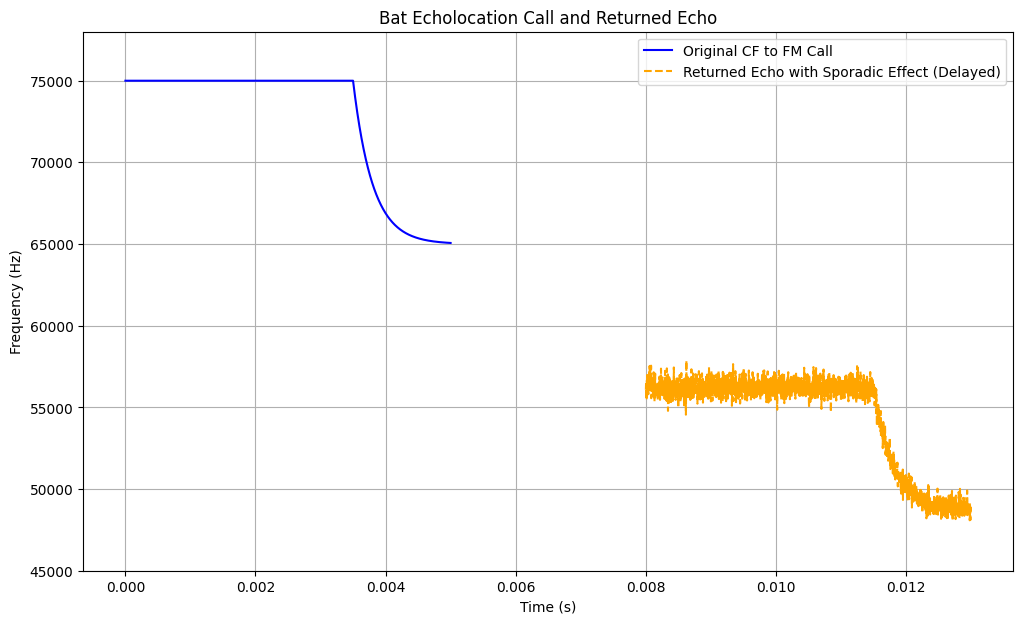

Distance to target: 1.37 meters


In [109]:
# Starting fresh to create a plot representing a bat's call that starts with a constant frequency (CF) portion and then transitions into a frequency modulation (FM) portion with a negative slope.

def calculate_distance(time_delay):
    """
    Calculate distance based on the time delay of the echo.
    Speed of sound = 343 m/s
    """
    distance = 343 * time_delay / 2  # Divide by 2 for the round trip
    return distance

# Parameters for the new call
start_frequency = 65000  # Hz, starting frequency for the FM portion
cf_frequency = 75000  # Hz, frequency for the CF portion
call_duration = 0.005  # seconds, total duration of the call
cf_duration = 0.0035  # seconds, duration of the CF portion
fm_duration = call_duration - cf_duration  # Duration of the FM portion

# Time vectors for the call
time = np.linspace(0, call_duration, 2000)  # More points for a smoother curve
time_cf = np.linspace(0, cf_duration, int(2000 * (cf_duration / call_duration)))
time_fm = np.linspace(cf_duration, call_duration, int(2000 * (fm_duration / call_duration)))
time_fm_normalized = np.linspace(0, fm_duration, len(time_fm))

# Create CF call segment
cf_call = np.full(len(time_cf), cf_frequency)

# Create FM call segment (negative slope)
decay_rate = 5 # Rate that the frequency decreases at
fm_call = start_frequency + (cf_frequency - start_frequency) * np.exp(-decay_rate * time_fm_normalized / fm_duration)

# Combine CF and FM segments
complete_call = np.concatenate((cf_call, fm_call))

# Adjusting time vectors for plotting
time_adjusted = np.concatenate((time_cf, time_fm))


# Adding an echo frequency that is returned to the bat after a time delay

# Adjust time vector for the echo to include the delay
echo_time_adjusted = time_adjusted + time_delay

# Parameters for the echo
time_delay = 0.008  # seconds, delay before the echo is returned
time_echo_normalized = np.linspace(echo_time_adjusted, time_delay, len(time_fm)) # Time vector for the echo, adjusted for the time delay

# Generate the echo frequency based on the complete call with some attenuation and time delay
# For simplicity, we'll use a mirrored version of the FM call for the echo, assuming the echo returns with similar characteristics but attenuated

# Creating a mirrored and attenuated version of the FM call for the echo
echo_attenuation = 0.75
echo_fm_call = (start_frequency + (cf_frequency - start_frequency) * np.exp(-decay_rate * time_fm_normalized / fm_duration)) * echo_attenuation
echo_cf_call = np.full(len(time_cf), cf_frequency * echo_attenuation) 

complete_echo = np.concatenate((echo_cf_call, echo_fm_call))

# Add sporadic effect to the echo frequencies
# Generate random noise
random_noise_intensity = 0.008  # Adjust intensity of noise here
random_noise = np.random.normal(1, random_noise_intensity, len(complete_echo))

# Apply random noise to echo frequencies to create sporadic effect
complete_echo_sporadic = complete_echo * random_noise

# Plotting the original call and its sporadic echo
plt.figure(figsize=(12, 7))
plt.plot(time_adjusted, complete_call, label='Original CF to FM Call', color='blue')
plt.plot(echo_time_adjusted, complete_echo_sporadic, label='Returned Echo with Sporadic Effect (Delayed)', linestyle='--', color='orange')
plt.title('Bat Echolocation Call and Returned Echo')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# Set custom frequency range
frequency_min = 45000  # Minimum frequency to display
frequency_max = 78000  # Maximum frequency to display
plt.ylim(frequency_min, frequency_max)
plt.legend()
plt.grid(True)
plt.show()

# Calculate distance based on the echo's time delay
distance = calculate_distance(time_delay)
print(f"Distance to target: {distance:.2f} meters")

In [110]:
import numpy as np

# Parameters for the simulation
cf_frequency = 75000  # Hz, frequency for the CF component
start_frequency_fm = 65000  # Hz, start frequency for the FM component
end_frequency_fm = 75000  # Hz, end frequency for the FM component
echo_delay = 0.005  # seconds, delay for the echo to return
doppler_shift = 200  # Hz, example Doppler shift for the CF component due to target velocity
attenuation_factor = 0.7  # Echo attenuation factor for simplicity

# Simulate echolocation call
def generate_echolocation_call():
    # In a full model, this would generate both CF and FM components
    return cf_frequency, start_frequency_fm, end_frequency_fm

# Simulate echo reception
def receive_echo(cf_frequency, start_frequency_fm, end_frequency_fm, doppler_shift, attenuation_factor):
    # Apply Doppler shift to CF component and attenuation to both components
    cf_echo = (cf_frequency + doppler_shift) * attenuation_factor
    fm_start_echo = start_frequency_fm * attenuation_factor
    fm_end_echo = end_frequency_fm * attenuation_factor
    return cf_echo, fm_start_echo, fm_end_echo

# CF/CF Area Processing for Velocity Measurement
def process_cf_cf_area(cf_echo, cf_frequency):
    # Calculate velocity based on Doppler shift (simplified)
    velocity = "Measured velocity based on Doppler shift"
    return velocity

# FM/FM Area Processing for Distance Measurement
def process_fm_fm_area(echo_delay):
    # Calculate distance based on time delay (simplified)
    distance = "Measured distance based on time delay"
    return distance

# Running the model
cf_frequency, start_frequency_fm, end_frequency_fm = generate_echolocation_call()
cf_echo, fm_start_echo, fm_end_echo = receive_echo(cf_frequency, start_frequency_fm, end_frequency_fm, doppler_shift, attenuation_factor)
velocity_info = process_cf_cf_area(cf_echo, cf_frequency)
distance_info = process_fm_fm_area(echo_delay)

Measured velocity based on Doppler shift
Measured distance based on time delay


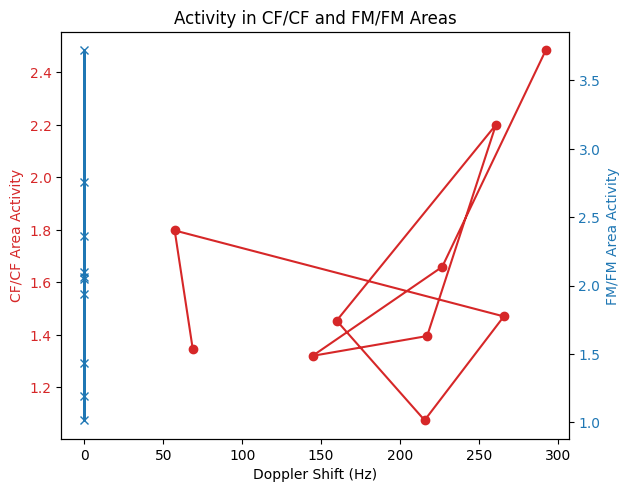

In [117]:
import matplotlib.pyplot as plt

# Example data for simulation
np.random.seed(95)  # For reproducibility
num_data_points = 10 # Number of random data points
doppler_shifts = np.random.uniform(0, 300, num_data_points)  # Random Doppler shifts in Hz
echo_delays = np.random.uniform(0.002, 0.008, num_data_points)  # Random echo delays in seconds
cf_cf_activity = np.random.uniform(1.0, 2.5, num_data_points)  # Random activity in CF/CF area
fm_fm_activity = np.random.uniform(1.0, 4.0, num_data_points)  # Random activity in FM/FM area


# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Doppler Shift (Hz)')
ax1.set_ylabel('CF/CF Area Activity', color=color)
ax1.plot(doppler_shifts, cf_cf_activity, color=color, marker='o', label='CF/CF Area Activity')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis to represent FM/FM area activity
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('FM/FM Area Activity', color=color)  
ax2.plot(echo_delays, fm_fm_activity, color=color, marker='x', label='FM/FM Area Activity')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Activity in CF/CF and FM/FM Areas')
plt.show()
